In [1]:
#For Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required librarires
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
#customizing columns and rows here,as we are using set.option() to change the default number of rows and columns to be displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
# Reading the data
df = pd.read_csv('day.csv') 

### Inspecting the data

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.shape

(730, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Preprocessing for EDA

In [9]:
# Checking for NAN values
df.isnull().sum()/df.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [10]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Replacing few of the nominal catagorical features with there respective values

df['season'] = df['season'].replace([1,2,3,4], ['spring','summer','fall','winter'])

df.mnth = df.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])

df.weekday = df.weekday.replace([0,1,2,3,4,5,6],['Sun','Mon','Tues','Wed','Thus','Fri','Sat'])

df.weathersit = df.weathersit.replace([1,2,3,4],['Clear','Mist_Cloudy','LightSnow_Rain','HeavySnow_Rain'])

In [13]:
print(df.temp.describe())
print(df.hum.describe())
print(df.windspeed.describe())

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64
count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64
count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64


In [14]:
# Creating buckets for temp, hum and windspeed features.

df['Temp_bin'] = pd.cut (df.temp,bins = [0,10,20,30,40], labels = ['0-10','11-20','21-30','31-40'])

df['Hum_bin'] = pd.qcut (df.hum, q = [0,0.25,0.6,1], labels = ['Low','Mid','High'])

df['windspeed_bin'] = pd.cut (df.windspeed,bins = [0,10,20,30,40], labels = ['0-10','11-20','21-30','31-40'])

### EDA

In [1]:
# Cheasking  the behaviour of 'cnt' feature w.r.t all the catagorical feature.

plt.figure(figsize=(15, 16))

plt.subplot(5,2,1)
df.groupby('weathersit')['cnt'].mean().plot.barh()

plt.subplot(5,2,2)
df.groupby('weekday')['cnt'].mean().plot.bar()

plt.subplot(5,2,3)
df.groupby('holiday')['cnt'].mean().plot.barh()

plt.subplot(5,2,4)
df.groupby('workingday')['cnt'].mean().plot.barh()

plt.subplot(5,2,5)
df.groupby('season')['cnt'].mean().plot.barh()

plt.subplot(5,2,6)
df.groupby('Temp_bin')['cnt'].mean().plot.barh()

plt.subplot(5,2,7)
df.groupby('Hum_bin')['cnt'].mean().plot.barh()

plt.subplot(5,2,8)
df.groupby('windspeed_bin')['cnt'].mean().plot.barh()

plt.subplot(5,2,9)
df.groupby('yr')['cnt'].mean().plot.barh()

plt.subplot(5,2,10)
df.groupby('mnth')['cnt'].mean().plot.bar()
plt.show()

NameError: name 'plt' is not defined

- When weather is clear the bike demands are more likelly to increase and when it is light snowy or rainy the bike demands are least.
- On Thusdays and Sundays the bike demands are higher.
- On holidays the bike demands least.
- The bike demands are higher in Fall seasons and less in spring seasons.
- When temperature is between 21 to 30 the bike demands are high and low when it is between 0 to 10.
- The bike demands are higher when wind speeds is between 0 to 10 and low when it is 31 to 40.
- The bike demands are higher in 2019 and low in 2018.As the year is increasing the demand is increasing.
- The bike demands are higher in the month June and September and low in January 

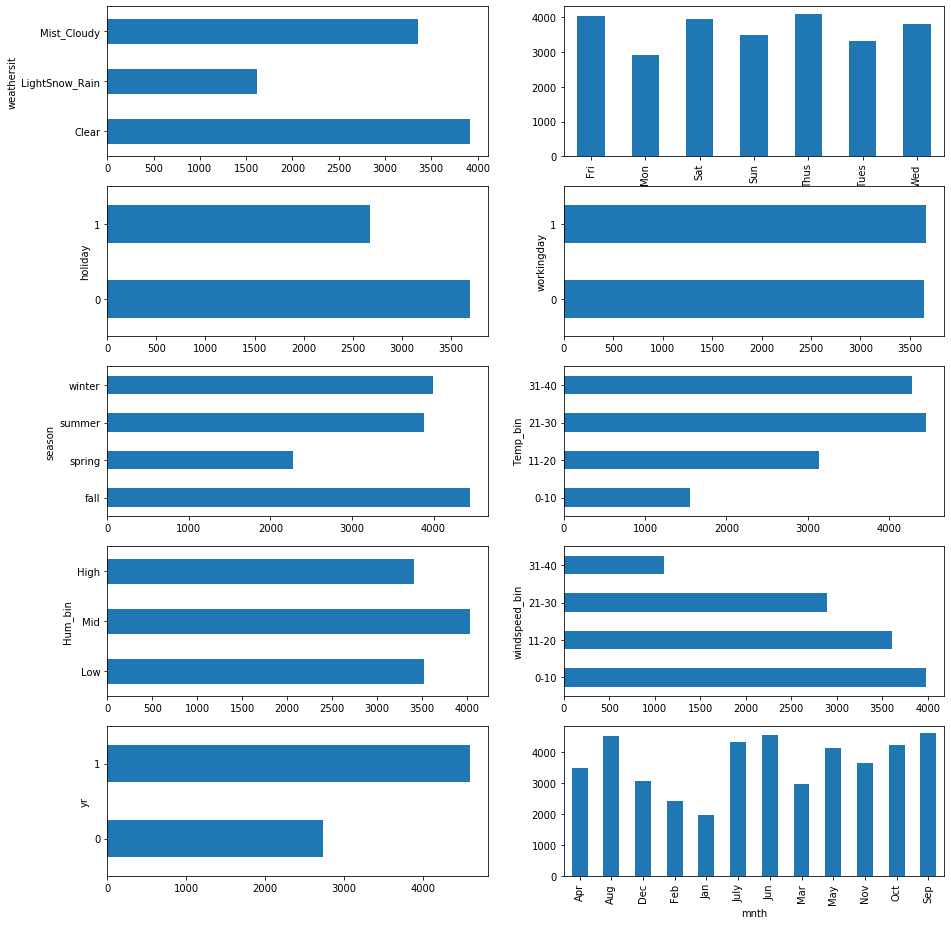

In [16]:
# Cheasking  the behaviour of 'registered' feature w.r.t all the catagorical feature.

plt.figure(figsize=(15, 16))

plt.subplot(5,2,1)
df.groupby('weathersit')['registered'].mean().plot.barh()

plt.subplot(5,2,2)
df.groupby('weekday')['registered'].mean().plot.bar()

plt.subplot(5,2,3)
df.groupby('holiday')['registered'].mean().plot.barh()

plt.subplot(5,2,4)
df.groupby('workingday')['registered'].mean().plot.barh()

plt.subplot(5,2,5)
df.groupby('season')['registered'].mean().plot.barh()

plt.subplot(5,2,6)
df.groupby('Temp_bin')['registered'].mean().plot.barh()

plt.subplot(5,2,7)
df.groupby('Hum_bin')['registered'].mean().plot.barh()

plt.subplot(5,2,8)
df.groupby('windspeed_bin')['registered'].mean().plot.barh()

plt.subplot(5,2,9)
df.groupby('yr')['registered'].mean().plot.barh()

plt.subplot(5,2,10)
df.groupby('mnth')['registered'].mean().plot.bar()
plt.show()

- On Thusdays and Friday the bike demands are higher.
- The behaviours of 'registered' and 'cnt' features are very similar.

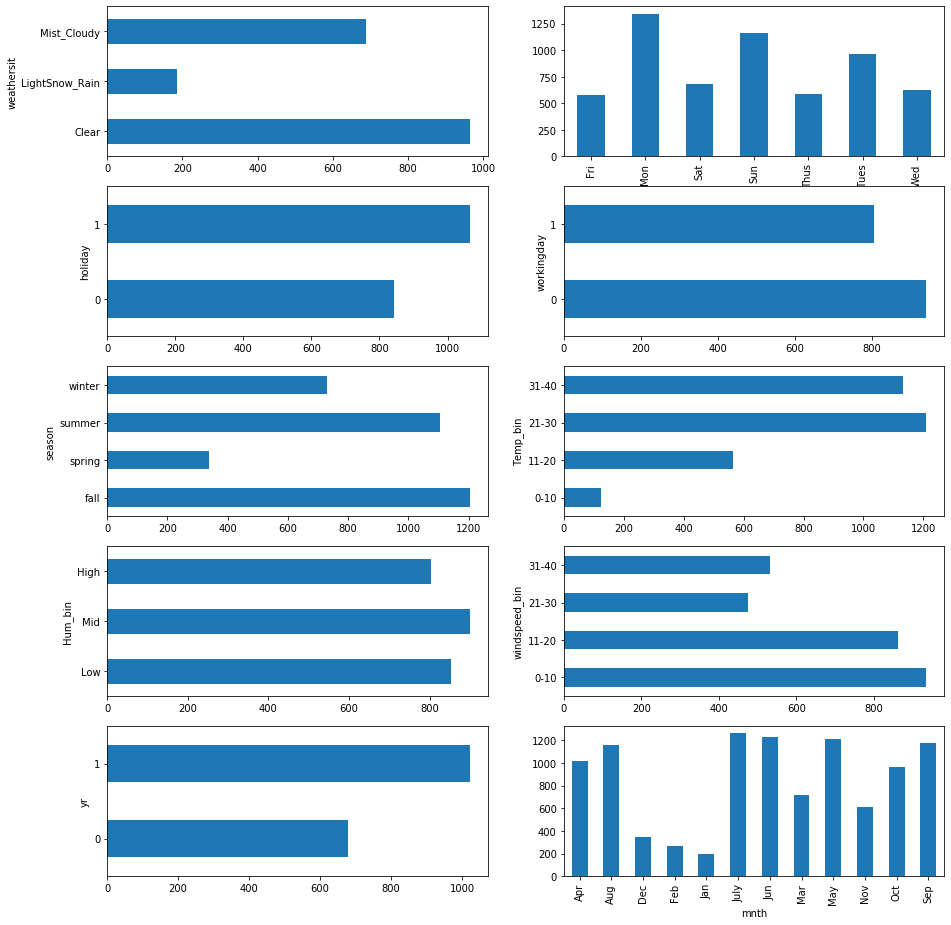

In [17]:
# Cheasking  the behaviour of 'casual' feature w.r.t all the catagorical feature.

plt.figure(figsize=(15, 16))

plt.subplot(5,2,1)
df.groupby('weathersit')['casual'].mean().plot.barh()

plt.subplot(5,2,2)
df.groupby('weekday')['casual'].mean().plot.bar()

plt.subplot(5,2,3)
df.groupby('holiday')['casual'].mean().plot.barh()

plt.subplot(5,2,4)
df.groupby('workingday')['casual'].mean().plot.barh()

plt.subplot(5,2,5)
df.groupby('season')['casual'].mean().plot.barh()

plt.subplot(5,2,6)
df.groupby('Temp_bin')['casual'].mean().plot.barh()

plt.subplot(5,2,7)
df.groupby('Hum_bin')['casual'].mean().plot.barh()

plt.subplot(5,2,8)
df.groupby('windspeed_bin')['casual'].mean().plot.barh()

plt.subplot(5,2,9)
df.groupby('yr')['casual'].mean().plot.barh()

plt.subplot(5,2,10)
df.groupby('mnth')['casual'].mean().plot.bar()
plt.show()

- On Mondays the bike demands are higher.
- On holidays the bike demands are higher and low on working days.
- The bike demands are higher when wind speeds is between 0 to 10 and low when it is 21 to 30.
- The bike demands are higher in the month July and June and low in January.

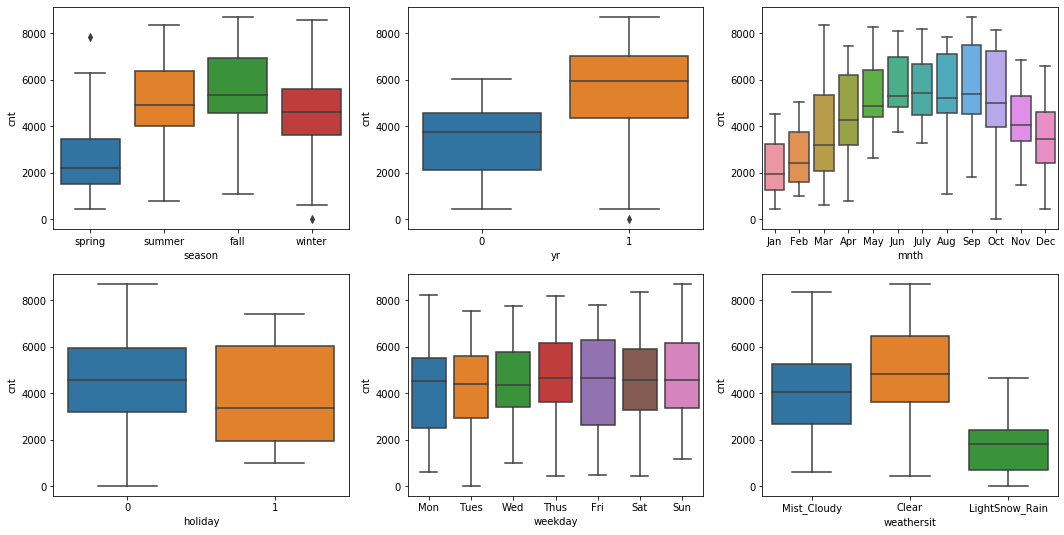

In [18]:
# Inspecting all the catagorical feature w.r.t. 'cnt'
plt.figure(figsize=(18,9))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

- The bike demands are less in spring seasons compaired to other seasons.
- The bike demands are on higher side in 2019
- The median is significantly higher for holidays which means demands are higher on holidays.
- When weather is light snowy or rainy the bike demands are significantly lower.
- The bike demands are actually higher in September month.

[]

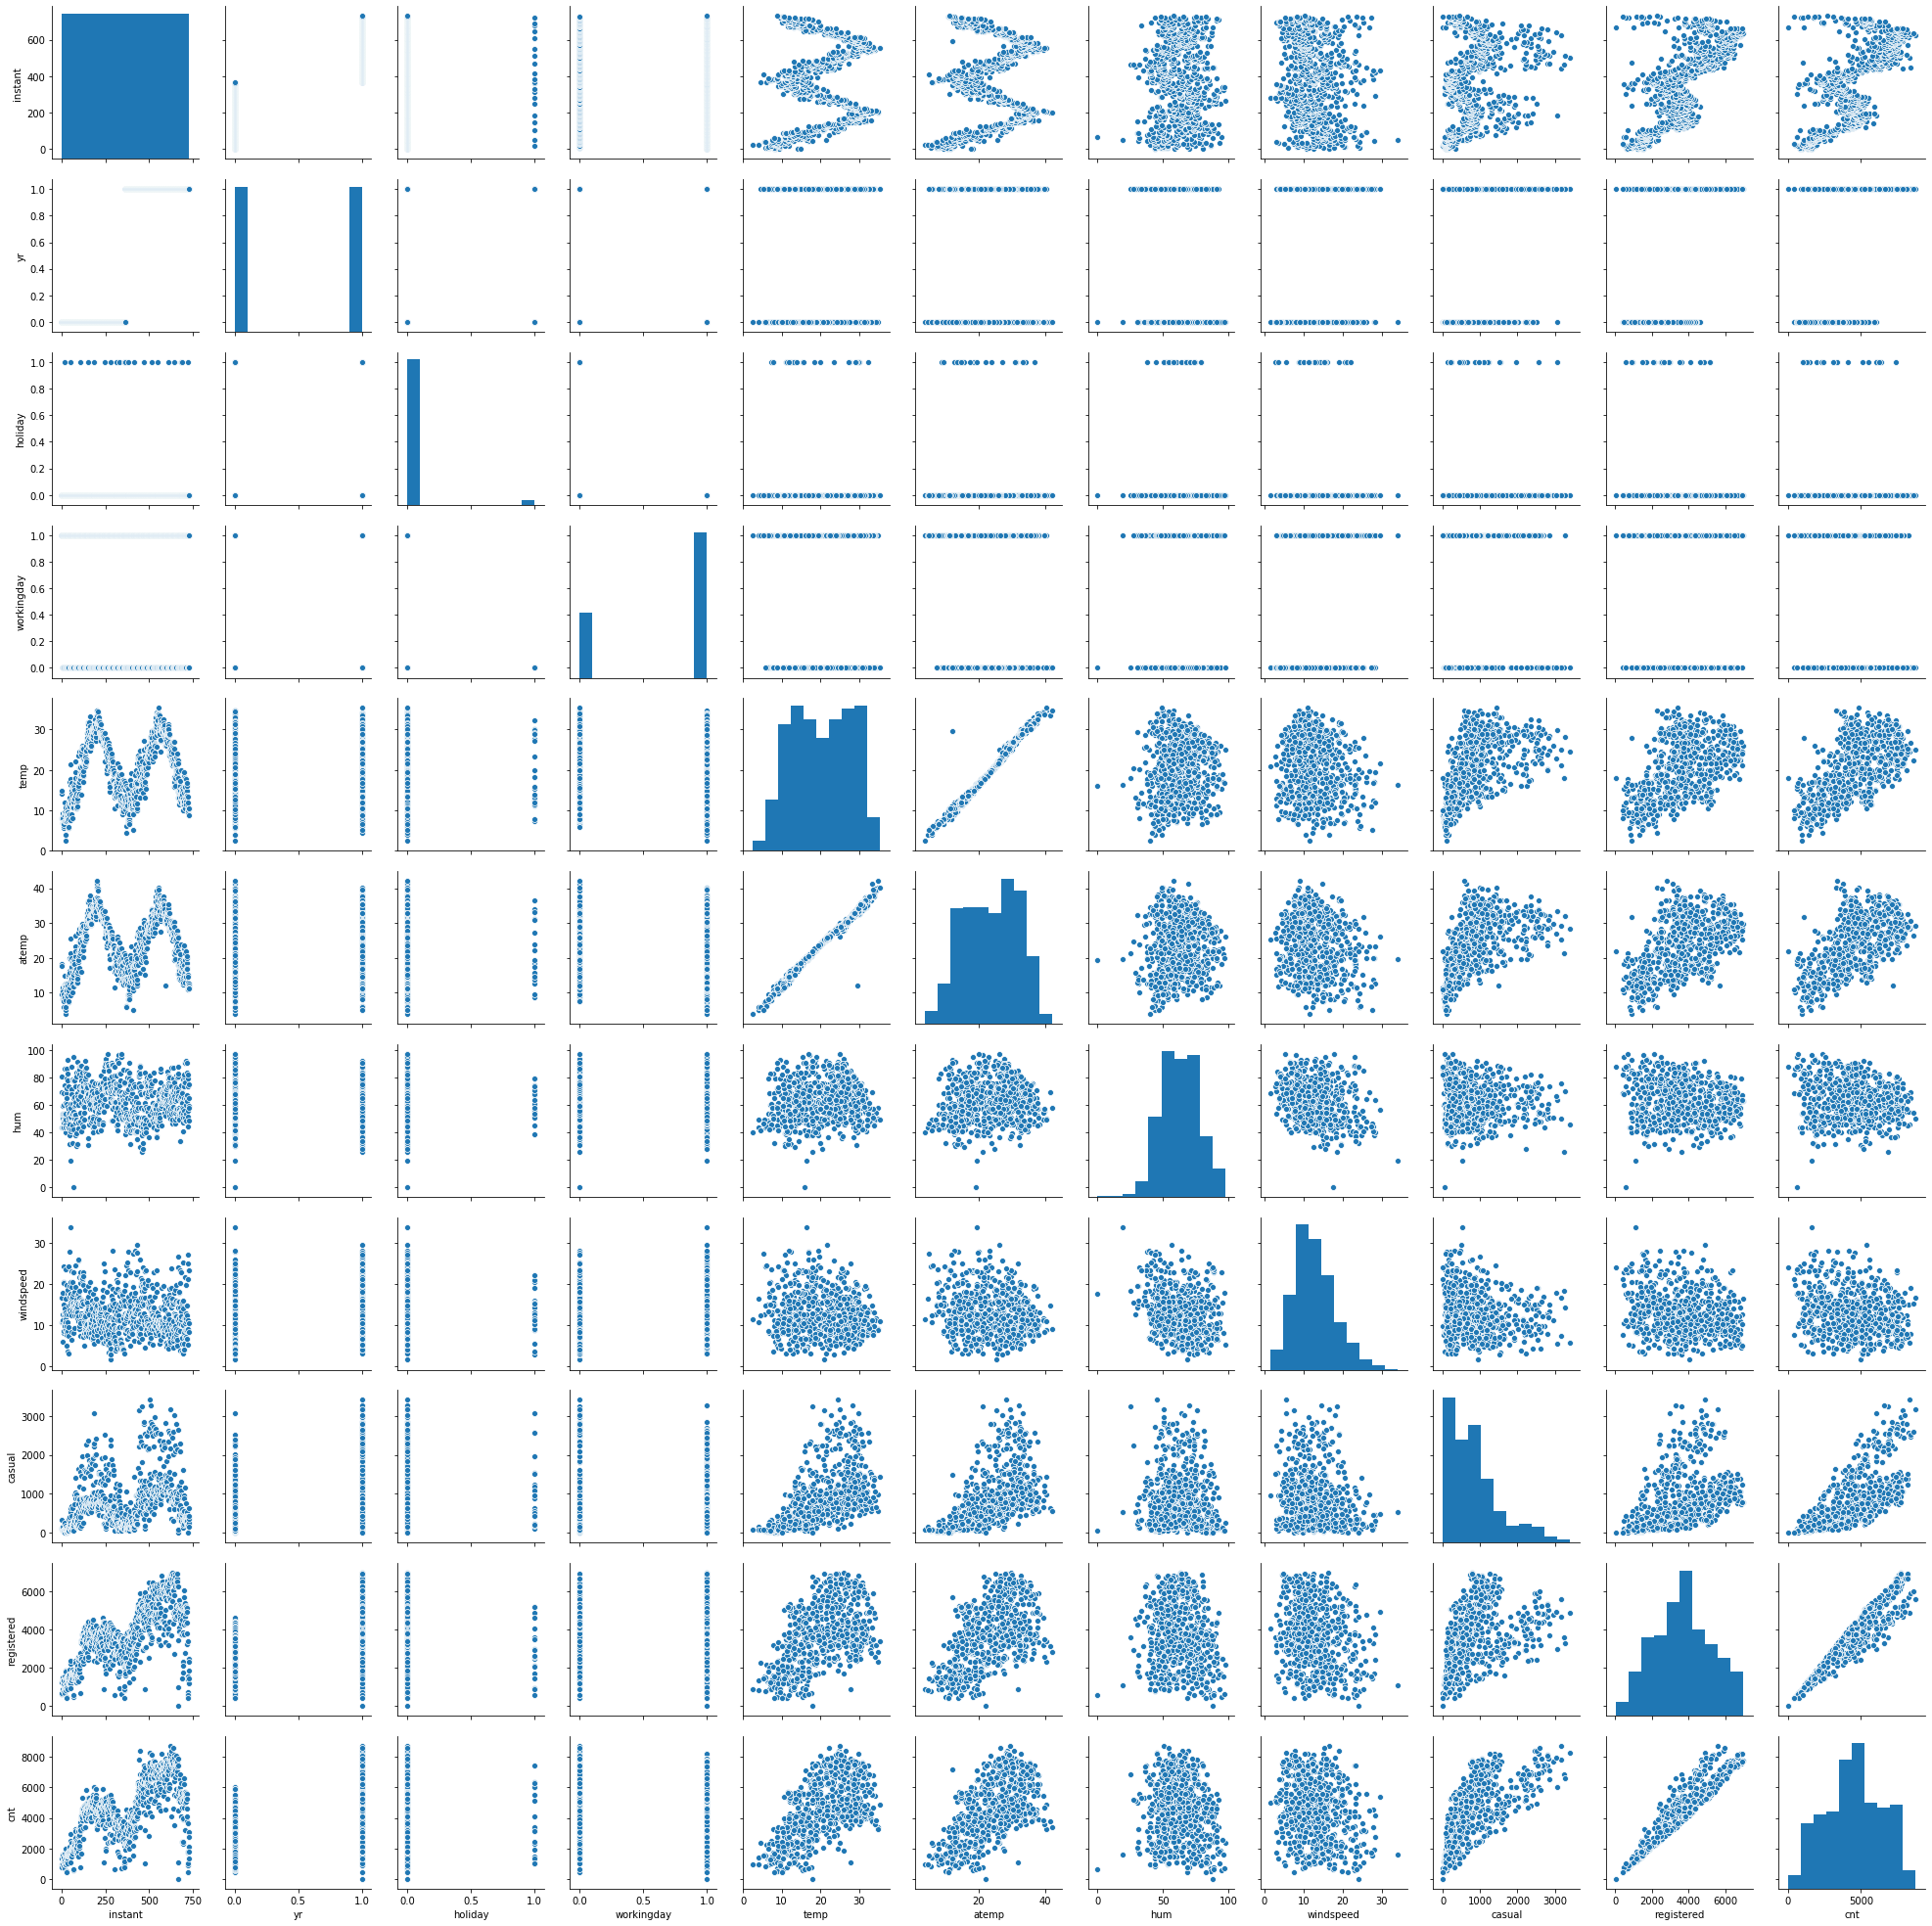

In [19]:
# Chacking relationship between continous features.
sns.pairplot(df)
plt.plot()

- There is some relatin ship between 'cnt' and 'temp' feature
- As 'cnt', 'casual' and registered are directilly propertional the have linear relationship.
- There is some relationship between 'cnt' vs 'hum' and 'cnt' vs 'windspeed'.
- There is a high linear relationship(corelation) between 'temp' vs 'atemp'.

In [20]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Temp_bin,Hum_bin,windspeed_bin
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,11-20,High,11-20
1,2,02-01-2018,spring,0,Jan,0,Tues,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,11-20,High,11-20
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0-10,Low,11-20
3,4,04-01-2018,spring,0,Jan,0,Thus,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0-10,Mid,11-20
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0-10,Low,11-20


### Preparing Data for Modelling

- Droping casual, registered features as cnt is directly proportional(sum) to both the features
- Droping instant as its a unique for all the records and also this feature is nominal categorical variable.
- Droping dteday as df already have month and year features.
- Droping all the features which were added for EDA.

In [21]:
# Droping features instant, dteday, casual, registered, Temp_bin, Hum_bin, windspeed_bin
l = ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
df1 = df[l]

In [22]:
df1.shape

(730, 12)

In [23]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thus,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


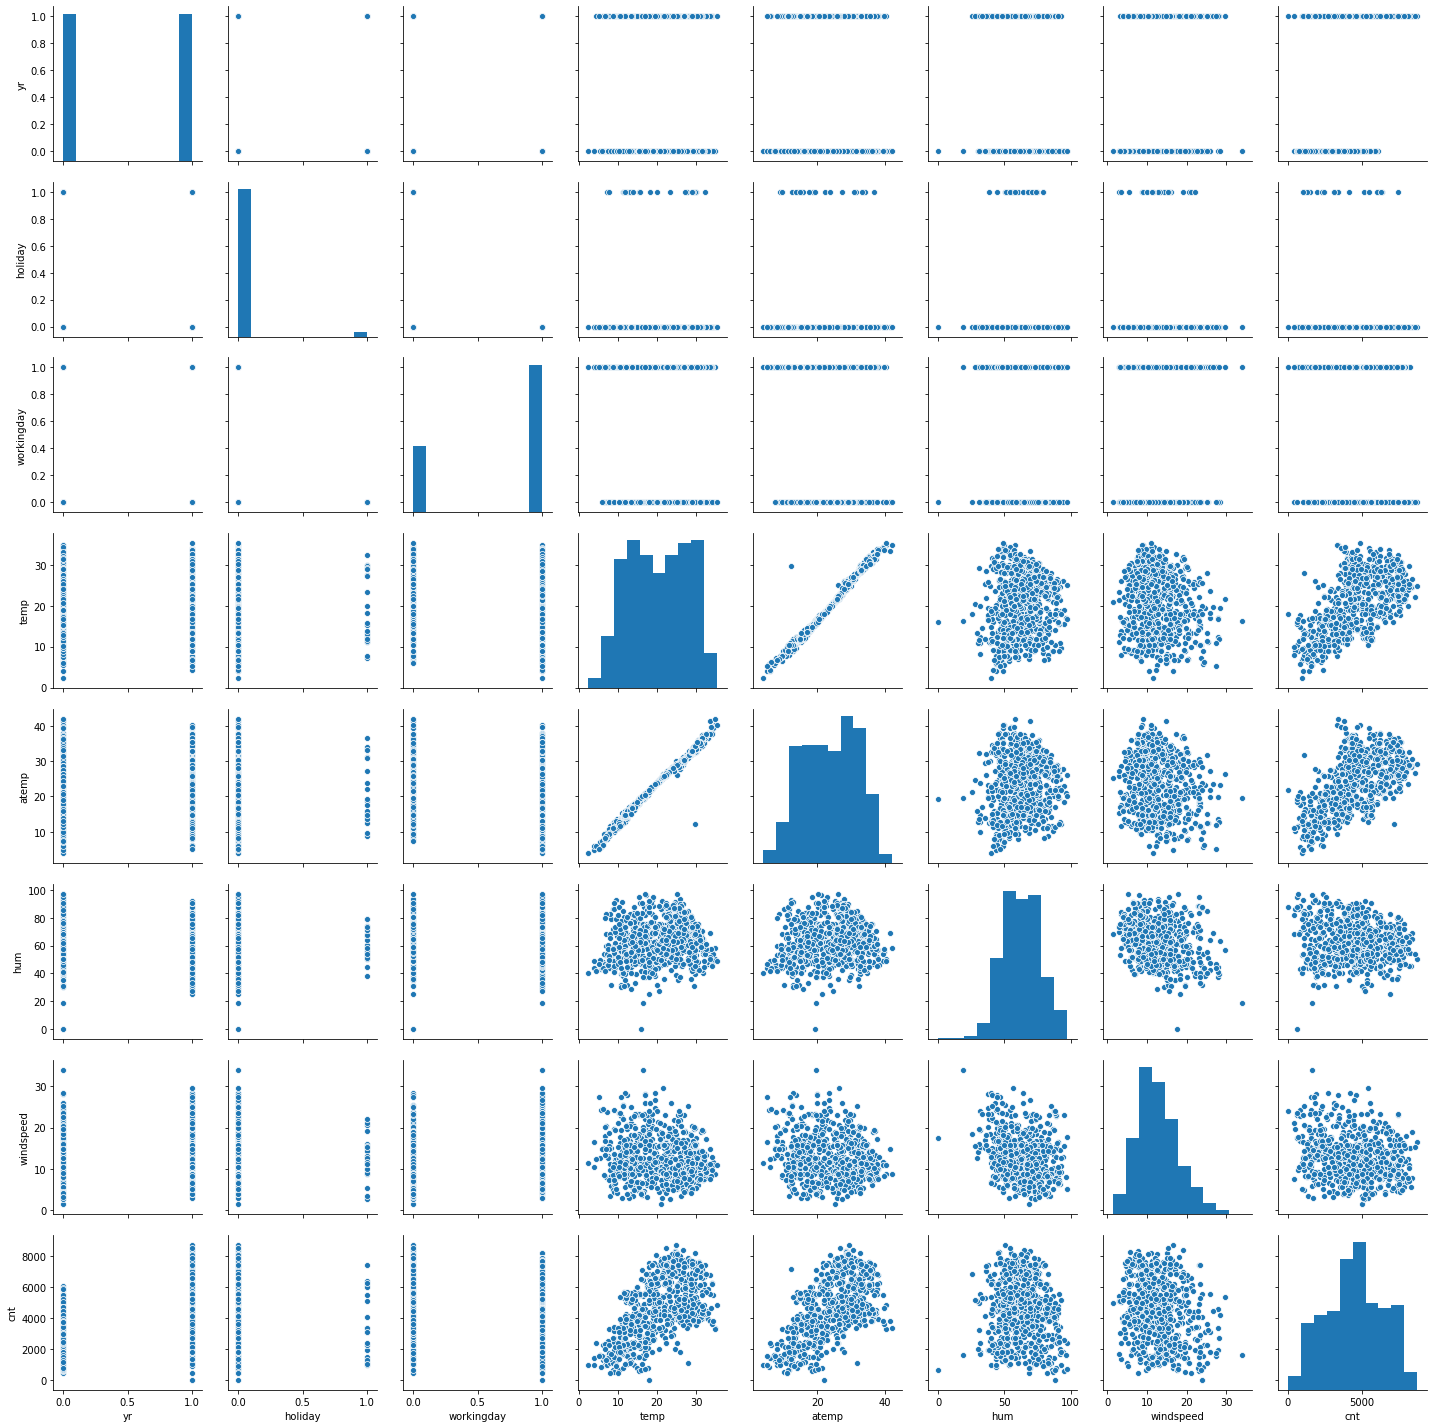

In [25]:
# Chacking relationship between continous features.
sns.pairplot(df1)
plt.show()

- Looks like there is a high linear relationship(corelation) between 'temp' and 'atemp' features.
- Also looks like there is some linear relation between cnt and temp features.
- Also looks like there is some relationshipe between hum, windspeed with cnt featuer.

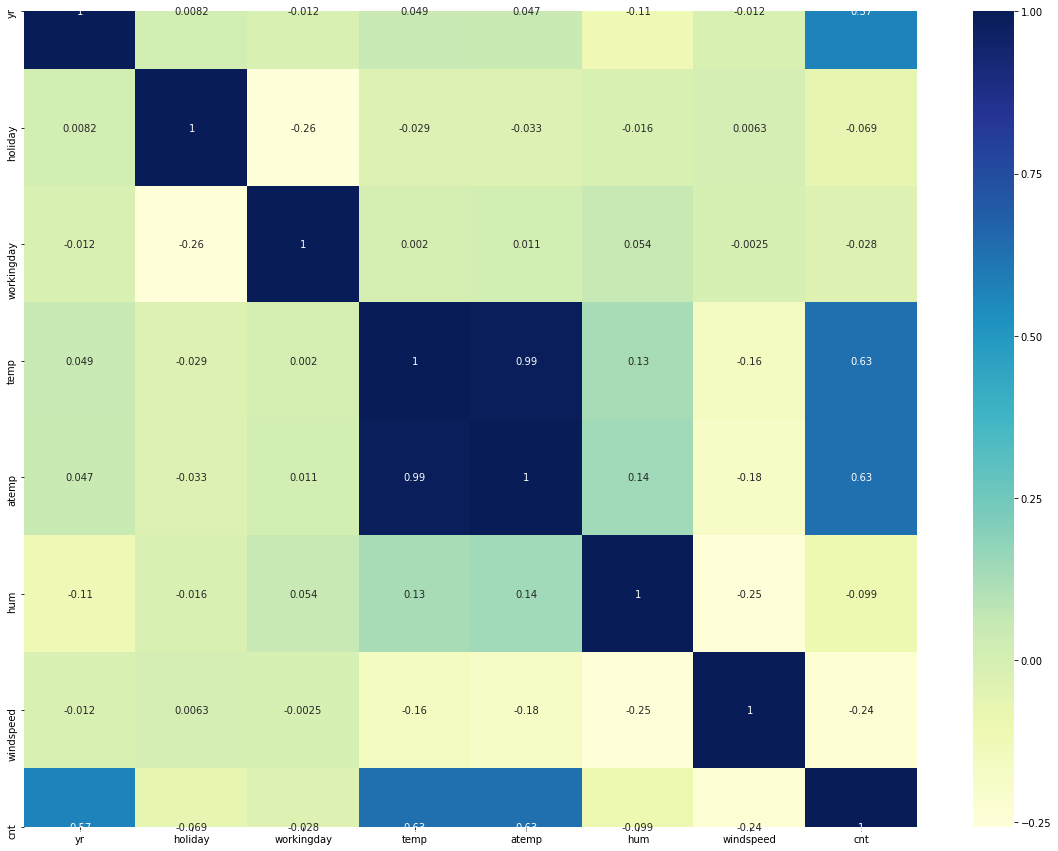

In [26]:
# ploting the corelation heatmap bet ween all the featuer.
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

- 'cnt' have correlation 0.57 with 'yr' feature, it might have high positive coeff.

In [27]:
# Droping atemp feature as it has very high correlation of 0.99 with temp feature.

df1.drop(['atemp'],axis=1,inplace=True)

In [28]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thus,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [29]:
# Creating the dummy variables for the feature 'season', storing it in a new variable - 'status' and droping the first column

status = pd.get_dummies(df1['season'],drop_first = True)

# Adding it to df1.

df1 = pd.concat([df1, status], axis = 1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tues,1,Mist_Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thus,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [30]:
# Creating the dummy variables for the feature 'mnth', storing it in a new variable - 'status' and droping the first column

status = pd.get_dummies(df1['mnth'],drop_first = True)

# Adding it to df1.

df1 = pd.concat([df1, status], axis = 1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tues,1,Mist_Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thus,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [31]:
# Creating the dummy variables for the feature 'weekday', storing it in a new variable - 'status' and droping the first column

status = pd.get_dummies(df1['weekday'],drop_first = True)

# Adding it to df1.

df1 = pd.concat([df1, status], axis = 1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thus,Tues,Wed
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tues,1,Mist_Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thus,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Creating the dummy variables for the feature 'weathersit', storing it in a new variable - 'status' and droping the first column

status = pd.get_dummies(df1['weathersit'],drop_first = True)

# Adding it to df1.

df1 = pd.concat([df1, status], axis = 1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thus,Tues,Wed,LightSnow_Rain,Mist_Cloudy
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tues,1,Mist_Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thus,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# Drop 'season', 'mnth', 'weekday', 'weathersit', as we have created the dummies for these.

df1.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [34]:
df1.shape

(730, 29)

In [35]:
df1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thus,Tues,Wed,LightSnow_Rain,Mist_Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# Making cnt feature as the first column in df1 dataframe.

c = list(df1.columns)
c[0],c[6] = c[6],c[0] 
df1 = df1[c]
df1.head()

,cnt,holiday,workingday,temp,hum,windspeed,yr,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thus,Tues,Wed,LightSnow_Rain,Mist_Cloudy
0,985,0,1,14.110847,80.5833,10.749882,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,801,0,1,14.902598,69.6087,16.652113,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1349,0,1,8.050924,43.7273,16.636703,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1562,0,1,8.200000,59.0435,10.739832,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1600,0,1,9.305237,43.6957,12.522300,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [37]:
# Spliting df1 in training and test sets.

df1_train, df1_test = train_test_split(df1, train_size = 0.7, random_state = 100)
print(df1_train.shape)
print(df1_test.shape)

(510, 29)
(220, 29)


In [38]:
# To scale all the big values and small values b/w a range in training set
scaler = MinMaxScaler()

# Appling scaler() to all the columns except the '1-0' and 'dummy' variables
num_var = ['temp','hum','windspeed','cnt']

df1_train[num_var] = scaler.fit_transform(df1_train[num_var])
df1_train[num_var].head()

,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [39]:
# Checkinf the description of new scaled values.
df1_train[num_var].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


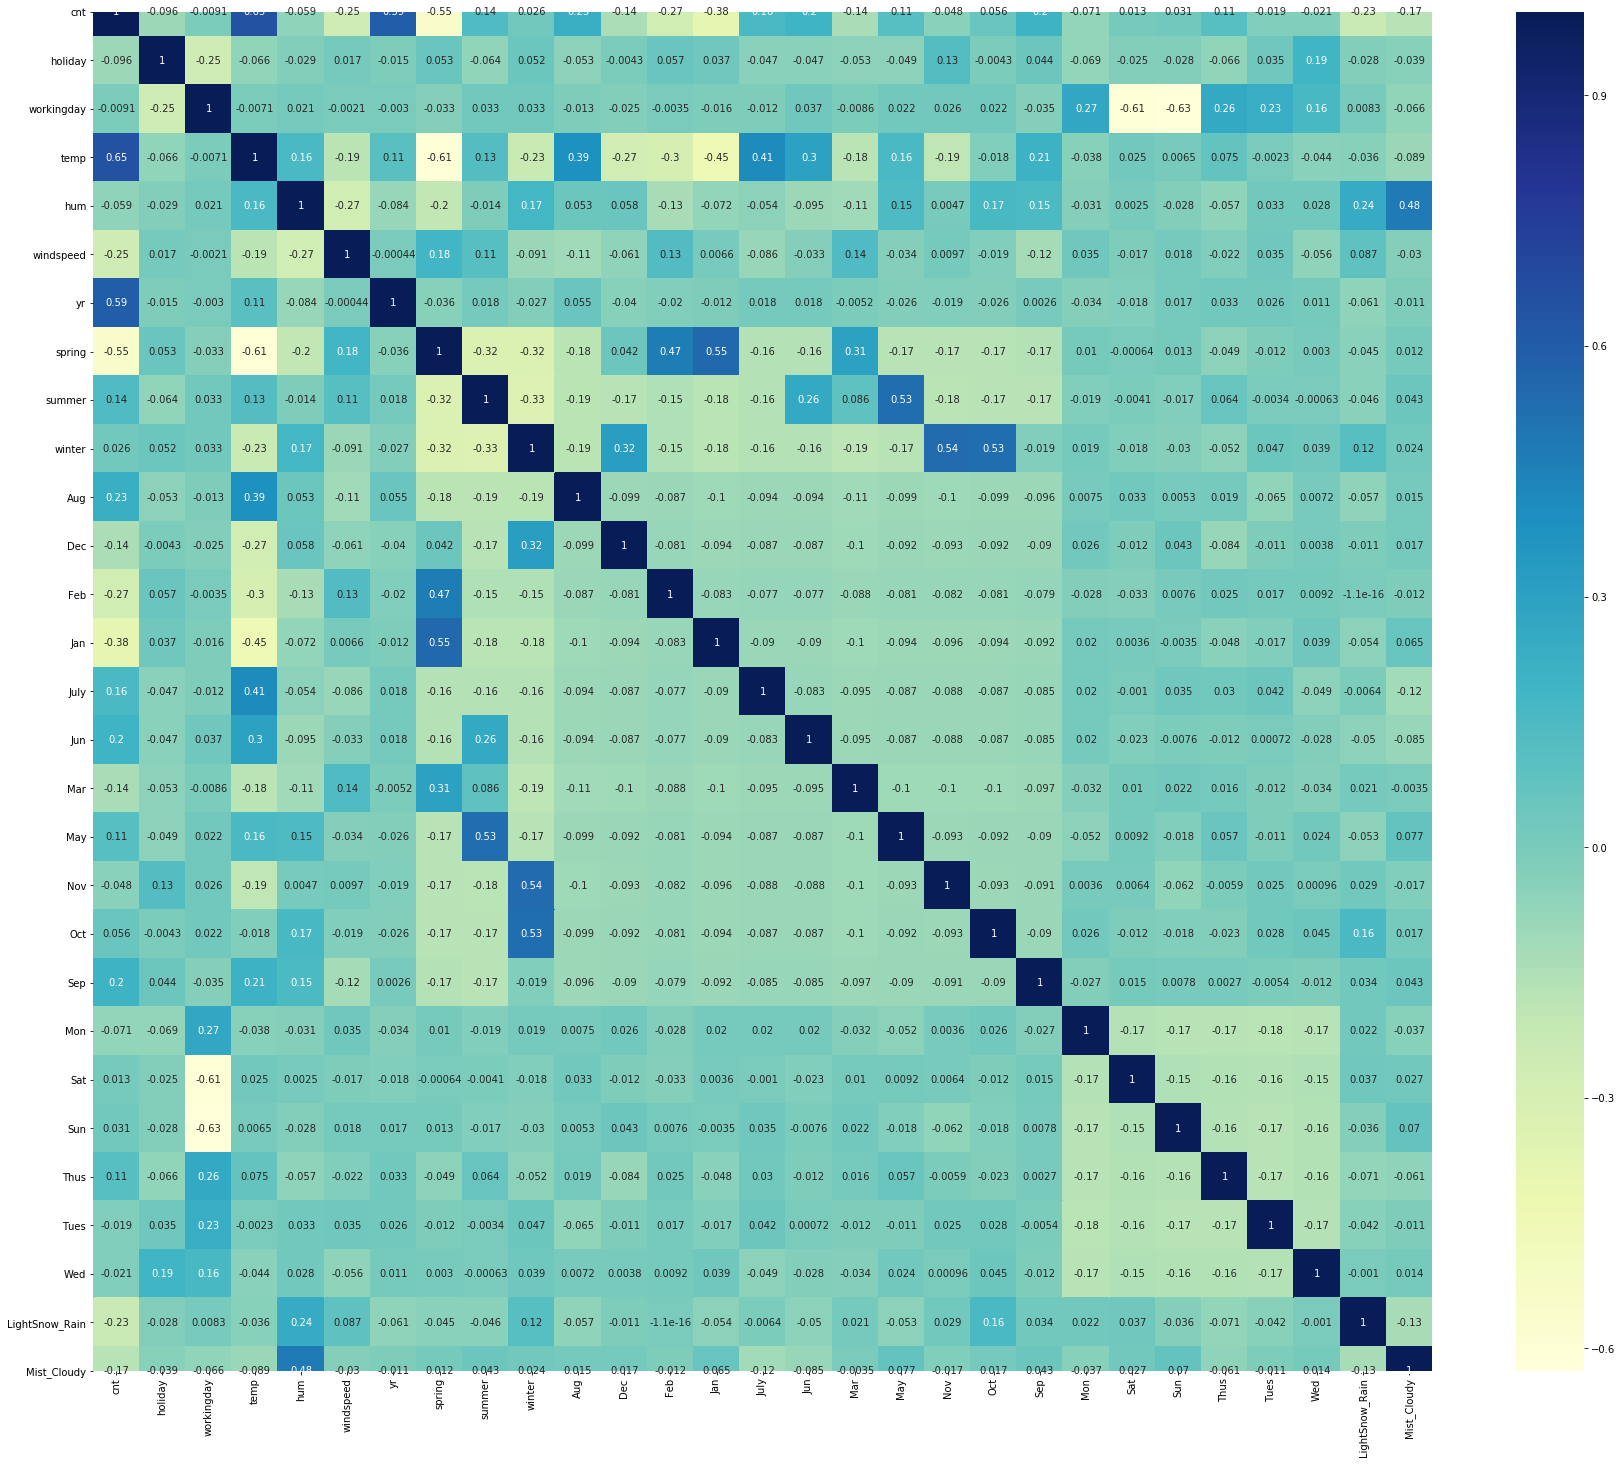

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(30,25))
sns.heatmap(df1_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- There is a high -ve corelation between 'spring' vs 'cnt' variable.
- There is a high -ve corelation between 'yr' vs 'cnt' and 'temp' vs 'cnt' and  variable .

### Dividing into X and Y sets for the model building

In [41]:
# Dividing X(independent) and y(target) sets from df1_train

y_train = df1_train.iloc[:,0]
X_train = df1_train.iloc[:,1:]

### Building a linear model

#### RFE

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # selecting top 13 features for now.
rfe = rfe.fit(X_train, y_train)

In [44]:
#  Checking which features are selected according to RFE.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('yr', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 16),
 ('May', False, 10),
 ('Nov', False, 2),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 6),
 ('Sun', False, 7),
 ('Thus', False, 15),
 ('Tues', False, 8),
 ('Wed', False, 12),
 ('LightSnow_Rain', True, 1),
 ('Mist_Cloudy', True, 1)]

In [45]:
# Top 13 features
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'yr', 'spring', 'summer',
       'winter', 'Jan', 'July', 'Sep', 'LightSnow_Rain', 'Mist_Cloudy'],
      dtype='object')

In [46]:
#  Features nor selected by RFE.
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Sat', 'Sun', 'Thus', 'Tues', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

- Lets assume the features having p-value > 5% is insignificant and VIF > 5 is insignificant.

In [47]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe).fit()   

#Checking the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          7.59e-190
Time:                        14:18:35   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2964      0.035      8.

- 'Jan' is selected by RFE but looks like it is insignificant in presence of other variables as p-value is more then 5%. Lets check the VIF.

In [49]:
X_train_rfe.columns

Index(['const', 'holiday', 'temp', 'hum', 'windspeed', 'yr', 'spring',
       'summer', 'winter', 'Jan', 'July', 'Sep', 'LightSnow_Rain',
       'Mist_Cloudy'],
      dtype='object')

In [50]:
# Rermoving 'const' from  X_train_rfe 
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [51]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,29.02
1,temp,16.71
3,windspeed,4.66
5,spring,4.34
7,winter,3.36
6,summer,2.79
12,Mist_Cloudy,2.29
4,yr,2.09
8,Jan,1.67
9,July,1.59


- Even if the the VIF is in the acceptence level for 'Jan' feature, the p-value is more the 5%, hence insignificant. Need to drop 'Jan' feature from the model. 

In [52]:
# Droping 'Jan' from X_train_rfe.
X_train_new = X_train_rfe.drop(['Jan'], axis = 1)

In [53]:
# Building the modal again without 'Jan' feature.
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm2 = sm.OLS(y_train,X_train_new).fit()   

#Checking the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.95e-190
Time:                        14:25:02   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2848      0.034      8.

- As we can see R2 droped from 0.843 to 0.842 which is not much of a drop and we didn't loose any predictive power. so 'Jan' was a redundant feature. 

In [54]:
X_train_new.columns

Index(['const', 'holiday', 'temp', 'hum', 'windspeed', 'yr', 'spring',
       'summer', 'winter', 'July', 'Sep', 'LightSnow_Rain', 'Mist_Cloudy'],
      dtype='object')

In [55]:
# Rermoving 'const' from  X_train_new 
X_train_new = X_train_new.drop(['const'], axis=1)

In [56]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,28.03
1,temp,16.03
3,windspeed,4.65
5,spring,4.01
7,winter,3.33
6,summer,2.79
11,Mist_Cloudy,2.28
4,yr,2.08
8,July,1.58
9,Sep,1.38


- we can see the the VIF of 'hum' feature is very high i.e. 28.03, therefore we need to drop this features from our Model otherwise this will cause into multicollinearity. 

In [57]:
# Droping hum from X_train_new.
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [58]:
# Building the modal again without 'hum' feature.
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm3 = sm.OLS(y_train,X_train_new).fit()   

#Checking the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.06e-187
Time:                        14:26:10   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

- As we can see R2 droped from 0.842 to 0.835 which is not much of a drop and we didn't loose any predictive power.

In [59]:
X_train_new.columns

Index(['const', 'holiday', 'temp', 'windspeed', 'yr', 'spring', 'summer',
       'winter', 'July', 'Sep', 'LightSnow_Rain', 'Mist_Cloudy'],
      dtype='object')

In [60]:
# Rermoving 'const' from  X_train_new 
X_train_new = X_train_new.drop(['const'], axis=1)

In [61]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
5,summer,2.23
4,spring,2.08
3,yr,2.07
6,winter,1.78
7,July,1.58
10,Mist_Cloudy,1.55
8,Sep,1.34
9,LightSnow_Rain,1.08


- Even if 'temp' is a significant feature but it has VIF 5.09 which is not in acceptance level so we need to drop this feature.

In [62]:
# Droping 'temp' from X_train_new.
X_train_new = X_train_new.drop(['temp'], axis = 1)

In [63]:
# Building the modal again without 'temp' feature.
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm4 = sm.OLS(y_train,X_train_new).fit()   

#Checking the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.02e-149
Time:                        14:37:02   Log-Likelihood:                 406.16
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     499   BIC:                            -743.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5837      0.017     34.

- We can see there is sudden dip in R2 value when we remove 'temp' feature which signifies that 'temp' is a significant feature but because of presence of this variable there will be multicollinearity, hence we need to drop this feature.  
- Also we can see that p-value of 'July' is more than 5% hence now its insignificant, but lets check VIF as well.

In [64]:
X_train_new.columns

Index(['const', 'holiday', 'windspeed', 'yr', 'spring', 'summer', 'winter',
       'July', 'Sep', 'LightSnow_Rain', 'Mist_Cloudy'],
      dtype='object')

In [65]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [66]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.81
3,spring,2.07
4,summer,2.01
2,yr,1.83
5,winter,1.73
9,Mist_Cloudy,1.52
6,July,1.19
7,Sep,1.16
8,LightSnow_Rain,1.08
0,holiday,1.04


- VIF of all the remaining features are less than 5 which is in acceptance lavel so the effect of multicollinearity will not impact the model.
- The p-value of 'July' feature is more tha 5% hence the respective feature is insignificant to the model. Need to drop the feature.

In [67]:
# Droping 'July' from X_train_new.
X_train_new = X_train_new.drop(['July'], axis = 1)

In [68]:
# Building the modal again without 'July' feature.
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm5 = sm.OLS(y_train,X_train_new).fit()   

#Checking the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          4.30e-150
Time:                        14:38:28   Log-Likelihood:                 405.99
No. Observations:                 510   AIC:                            -792.0
Df Residuals:                     500   BIC:                            -749.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5790      0.015     39.

- As we can see R2 is same but ad.R2 increased from 0.758 to 0.759 which is better and we didn't loose any predictive power. so 'July' was a redundant feature.
- So we can say this model will be the final model with R2 of 0.763 and ad.R2 of 0.759.
- We can say that variable 'yr' is having highest positive coefficient which mean this variable is highly corelated with the target variable.
- We can say that variable 'spring' and 'LightSnow_Rain' are having highest negative coefficient which mean this variable is highly negetivly corelated with the target variable.
- The variable 'Sep' and 'summer' is also the best predictor of target variable.
- The final modal is able to explain 76.3% variance by the taking 9 variable.

### Residual Analysis of the train data

#### Distribution of the error terms

In [69]:
# Predicting value for training set
y_train_pred = lm5.predict(X_train_new)

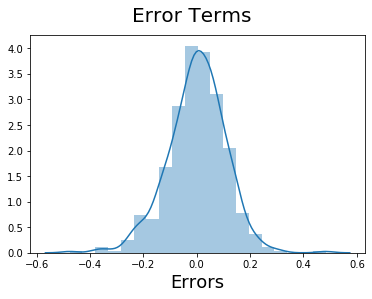

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)           
plt.show()

- As per our assumption for residuals the above plot is verifing that the residuals for the predictive model(lm5) created follows the normal distribution mean 0.

In [72]:
# Droping the const term
X_train_new = X_train_new.drop(['const'], axis=1)

### Making Predictions

#### Applying the scaling on the test sets

In [73]:
# Appling scaler() to all the columns except the '1-0' and 'dummy' variables
num_var = ['temp','hum','windspeed','cnt']

df1_test[num_var] = scaler.transform(df1_test[num_var])
df1_test[num_var].head()

,temp,hum,windspeed,cnt
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


#### Dividing into X_test and y_test

In [74]:
#Extracting X(independent) and y(target) sets from df1_test

y_test = df1_test.iloc[:,0]
X_test = df1_test.iloc[:,1:]

In [75]:
# Using our final model(lm5) to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [76]:
# Making predictions
y_pred = lm5.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

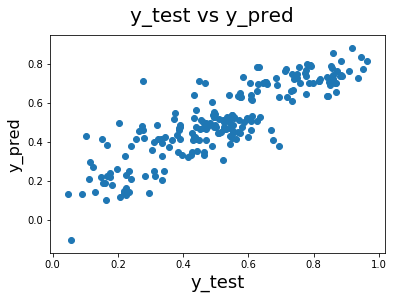

In [77]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                         

In [78]:
# Calculating R2 for the test set.
r2_score(y_true=y_test,y_pred=y_pred)

0.7419791363256165

- As we can see the the model we have created lm5, is giving me the R2 value of 0.763 on training set and R2 value of 0.742 on test set, which is very close R2 of training set, hence we can say that the MLR model is performing good on test set.